In [2]:
import mrcnn
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.models import load_model


from os import listdir
from xml.etree import ElementTree

%matplotlib inline

Using TensorFlow backend.


In [3]:
import tensorflow as tf
tf.__version__

'1.3.0'

In [4]:
class PredictionConfig(Config):
    NAME = "crossings_cfg20200105T1348"
    # Number of classes (background + crossings+ no_crossings )
    NUM_CLASSES = 1 +1 +1
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 80
    DETECTION_MIN_CONFIDENCE = 0.80
     # setting Max ground truth insances
    MAX_GT_INSTANCES=5
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
cfg = PredictionConfig()

In [5]:
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model.load_weights('mask_rcnn_crossings_confidence_85_0043.h5', by_name=True)

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [7]:
def show_crossings(img, result):
    
    '''Function to show only crossings '''
    
    index = np.where(result['class_ids']==1)  # take only crossings ids 
    #print(index)
    ids = (result['class_ids'][index]) # predicted class ids
    ids = ids.reshape(-1)  
    
    box = result['rois'][index].reshape(-1,4)
    #classes = np.array(index).reshape(2,-1)
    row, col = r['masks'].shape[0], r['masks'].shape[1] 
    mask = r['masks'][:,:,index].reshape(row, col, -1)
    
    scores = r['scores'][index].reshape(-1)
    
    visualize.display_instances(img, box, mask,ids,['BG', 'c', ],scores, figsize=(8,8))


*** No instances to display *** 



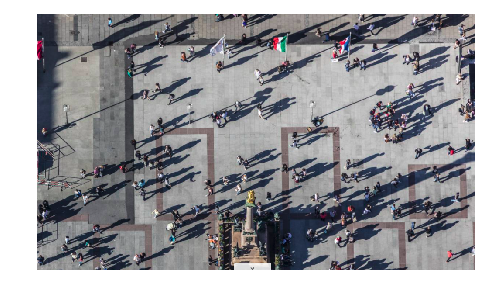

In [13]:
img = load_img('/home/jyoti/Downloads/Screenshot 2020-01-09 at 14.21.19.png')
# nz2.PNG
img = img_to_array(img)
# detecting objects in the image
result= model.detect([img])
r = result[0]
show_crossings(img, r )

In [12]:
r['class_ids']
r['scores']

array([0.9510198 , 0.9486385 , 0.92962915, 0.8197429 , 0.8031685 ],
      dtype=float32)


*** No instances to display *** 



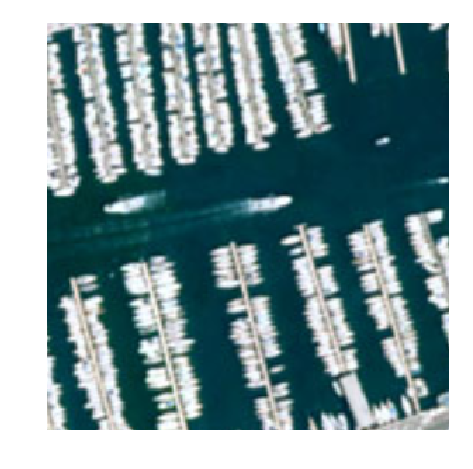

In [10]:
img = load_img('/home/jyoti/Downloads/nz2.PNG')
# nz2.PNG
img = img_to_array(img)
# detecting objects in the image
result= model.detect([img])
r = result[0]
#visualize.display_instances(img, r['rois'], r['masks'],r['class_ids'],['BG', 'c', 'n'], r['scores'],)
show_crossings(img, r )


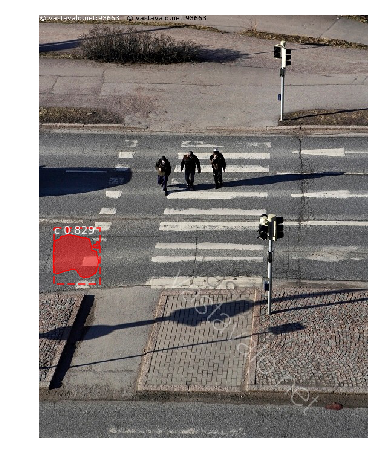

In [9]:
img = load_img('/home/jyoti/Downloads/normal_20080226ARIA03.JPG')
# nz2.PNG
img = img_to_array(img)
# detecting objects in the image
result= model.detect([img])
r = result[0]
#visualize.display_instances(img, r['rois'], r['masks'],r['class_ids'],['BG', 'c', 'n'], r['scores'],)
show_crossings(img, r )

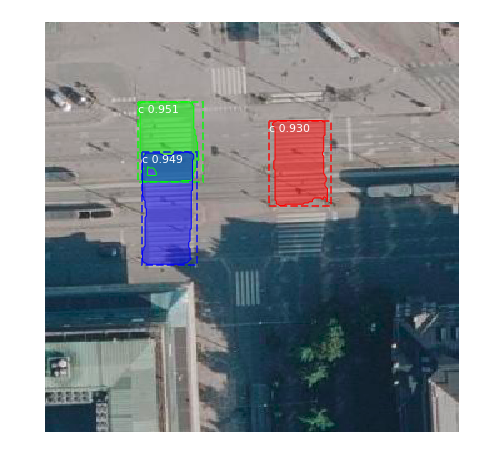

In [10]:
img = load_img('/home/jyoti/Downloads/Screenshot 2020-01-09 at 13.32.58.png')
# nz2.PNG
img = img_to_array(img)
# detecting objects in the image
result= model.detect([img])
r = result[0]
show_crossings(img, r)
#visualize.display_instances(img, r['rois'], r['masks'],r['class_ids'],['BG', 'c', 'n'], r['scores'],)    


*** No instances to display *** 



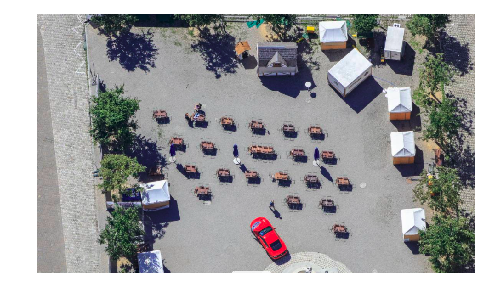

In [13]:
img = load_img('/home/jyoti/Downloads/Screenshot 2020-01-09 at 14.17.07.png')
# nz2.PNG
img = img_to_array(img)
# detecting objects in the image
result= model.detect([img])
r = result[0]
show_crossings(img, r)

In [14]:
r

{'class_ids': array([], dtype=int32),
 'masks': array([], shape=(564, 953, 0), dtype=float64),
 'rois': array([], shape=(0, 4), dtype=int32),
 'scores': array([], dtype=float32)}